In [1]:
import os

In [2]:
import pandas as pd
os.listdir('.')

['.DS_Store', 'Experiment.ipynb', 'trials.ipynb', 'WineQT.csv']

In [3]:
wines = pd.read_csv('WineQT.csv')
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
for col in wines.columns:
    if(wines[col].isnull().sum()>0):
        print(col)
    else:
        print("No null values are present in the data")

No null values are present in the data
No null values are present in the data
No null values are present in the data
No null values are present in the data
No null values are present in the data
No null values are present in the data
No null values are present in the data
No null values are present in the data
No null values are present in the data
No null values are present in the data
No null values are present in the data
No null values are present in the data
No null values are present in the data


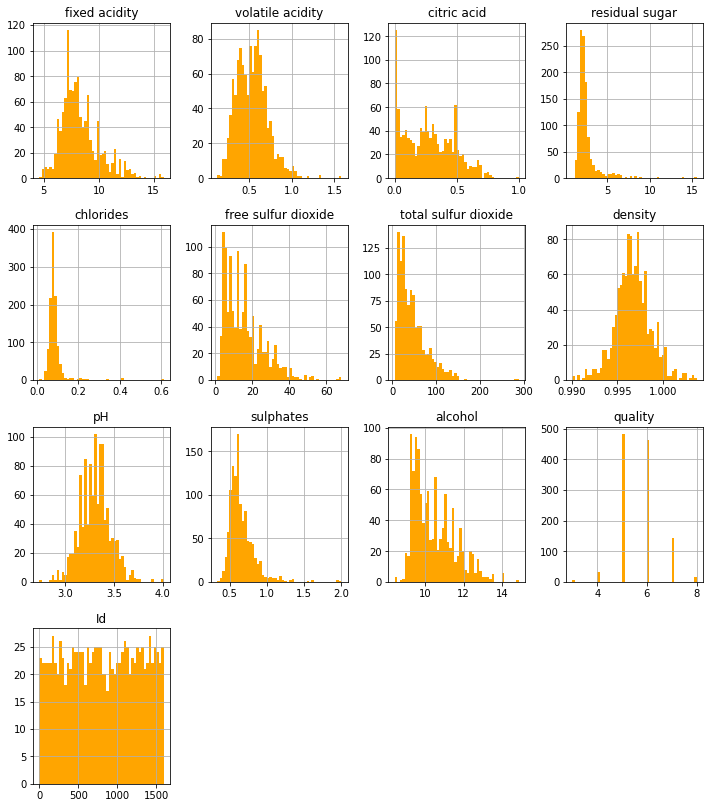

In [13]:
import matplotlib.pyplot as plt
wines.hist(bins=50, color='orange', figsize=(12,14))
plt.show()

In [14]:
wines.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [15]:
X = wines.drop(columns=['quality'])
y = wines['quality']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(914, 12) (229, 12) (914,) (229,)


In [16]:
y_test

158     5
1081    6
291     5
538     6
367     6
       ..
66      4
328     6
67      5
231     6
966     6
Name: quality, Length: 229, dtype: int64

In [17]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

In [19]:
y_test_pred

array([5.74715297, 5.64044   , 5.31433699, 5.70576332, 5.75644162,
       5.79609475, 5.61741565, 5.48684773, 5.6519983 , 5.52243144,
       5.51073286, 5.66628885, 5.79404917, 5.76293595, 5.84322999,
       5.48038503, 5.74653123, 5.81928136, 5.81377964, 5.74032761,
       5.82006849, 5.80982056, 5.3760972 , 5.74256032, 5.71136862,
       5.56013437, 5.8064313 , 5.7244343 , 5.63608156, 5.73354741,
       5.80549374, 5.66819584, 5.73809491, 5.69992405, 5.61438567,
       5.32488916, 5.56677912, 5.78884999, 5.6393554 , 5.32859085,
       5.72869254, 5.74197214, 5.53138592, 5.79832915, 5.77855522,
       5.69438901, 5.61472829, 5.67081801, 5.25029723, 5.82330395,
       5.75349687, 5.61839329, 5.6619973 , 5.60614154, 5.58919187,
       5.6415147 , 5.71324035, 5.76672625, 5.71661464, 5.71771759,
       5.69689914, 5.79765067, 5.60855147, 5.81949191, 5.78271157,
       5.57905766, 5.68298452, 5.7310322 , 5.45017097, 5.80335955,
       5.75488571, 5.72275138, 5.47021388, 5.76806993, 5.69167

In [20]:
len(y_test_pred)

229

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [22]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2

In [23]:
(rmse, mae, r2) = eval_metrics(y_test, y_test_pred)

In [24]:
rmse

0.727747272803586

In [25]:
mae

0.5994239326611199

In [26]:
r2

0.04826271205386312